# Features selection

In [10]:
# Author: Soumya Sambeet Mohapatra
# Date: 03-05-2022
# Description: Code to select most independent features using Heatmap of Correlation matrix
# Edits:
# (21-05-2022) - Modified approach to identify independent features

* This notebook contains code for selection of important features from the dataset.
* The important features are selected and filtered from the dataset and stored in a new file.
* The definitions of the selected features are provided below for reference.

## Importing modules

In [35]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix

## Loading data from CSV file

In [25]:
df = pd.read_csv('data/genre_data_clean.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,year,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,audio_features,14J3PO0VnhtcRa31r7Aj1L,spotify:track:14J3PO0VnhtcRa31r7Aj1L,https://api.spotify.com/v1/tracks/14J3PO0Vnhtc...,https://api.spotify.com/v1/audio-analysis/14J3...,273573,4,1999,acoustic
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,audio_features,2SZDu4esDLUISRnpYQE17b,spotify:track:2SZDu4esDLUISRnpYQE17b,https://api.spotify.com/v1/tracks/2SZDu4esDLUI...,https://api.spotify.com/v1/audio-analysis/2SZD...,277667,3,1999,acoustic
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,audio_features,5E2EpolcGmcbYpsv0z6jAZ,spotify:track:5E2EpolcGmcbYpsv0z6jAZ,https://api.spotify.com/v1/tracks/5E2EpolcGmcb...,https://api.spotify.com/v1/audio-analysis/5E2E...,226933,4,1999,acoustic
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,audio_features,5RVEXH7OR9rcRz7eeviOzc,spotify:track:5RVEXH7OR9rcRz7eeviOzc,https://api.spotify.com/v1/tracks/5RVEXH7OR9rc...,https://api.spotify.com/v1/audio-analysis/5RVE...,223948,4,1999,acoustic
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,audio_features,7CNaYAdLyi86kofGafReiT,spotify:track:7CNaYAdLyi86kofGafReiT,https://api.spotify.com/v1/tracks/7CNaYAdLyi86...,https://api.spotify.com/v1/audio-analysis/7CNa...,139693,4,1999,acoustic


## Removing unnecessary features

There are 21 columns in the dataset. Below is a list of all the columns.

In [26]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'year', 'genre'],
      dtype='object')

It can be identified that the following columns have no significance in training a machine learning mode:

1. `type`
2. `id`
3. `uri`
4. `track_href`
5. `analysis_url`
6. `year`
7. `duration_ms`

Therefore, these columns are dropped from the dataset.

In [28]:
df.drop(
    ['type', 'id', 'uri', 'track_href', 'analysis_url', 'year', 'duration_ms'], 
    axis=1, 
    inplace=True
) 
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,4,acoustic
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,3,acoustic
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,4,acoustic
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,4,acoustic
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,4,acoustic


## Correlation Matrix

It can be shown that some features are more uncorrelated with the dataset in comparison to others. Features with high correlation add redundant information and in general, they negatively affect the performance of a machine learning mode. 

<AxesSubplot:>

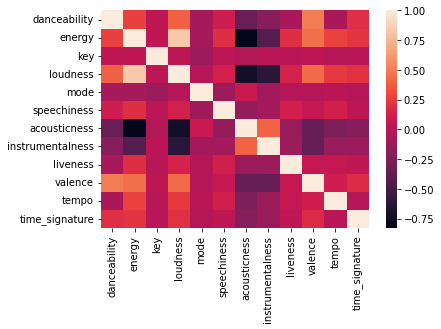

In [29]:
sns.heatmap(df.corr())

From the above heatmap, it can be seen that the feature `energy` has strong negative correlation with `acousticness`. The feature `loudness` also has strong negative correlation with `acousticness`. Therefore, we eliminate `acousticness` from the dataset.

<AxesSubplot:>

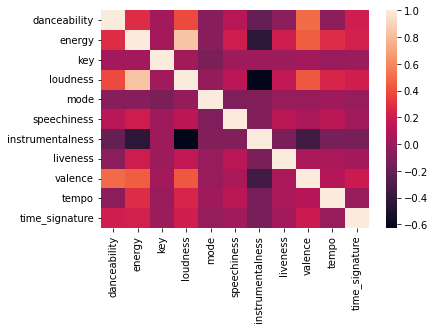

In [30]:
df.drop(['acousticness'], axis=1, inplace=True)
sns.heatmap(df.corr())

After elimination of `acousticness`, from the new correlation heatmap, we see that `energy` has strong positive correlation with `loudness` and strong negative correlation with `instrumentalness`. So, in this stage, we remove the feature `energy`.

<AxesSubplot:>

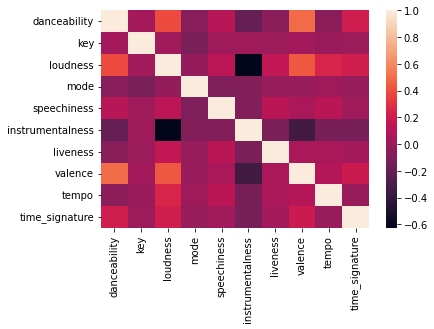

In [31]:
df.drop('energy', axis=1, inplace=True)
sns.heatmap(df.corr())

With `energy` dropped, we still see that `instrumentalness` has strong negative correlation with `loudness` and `valence`. Therefore, we can eliminate `instrumentalness`.

<AxesSubplot:>

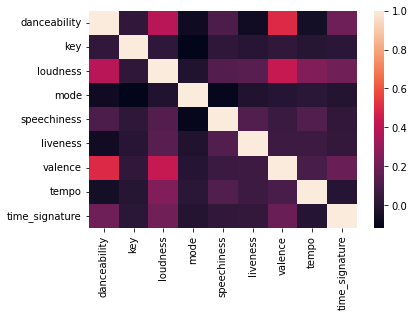

In [32]:
df.drop('instrumentalness', axis=1, inplace=True)
sns.heatmap(df.corr())

We almost have a feature set where most of the features are independent. We still see that `valence` has some positive correlation with `loudness` and `danceability`. Therefore, we eliminate `valence` now.

<AxesSubplot:>

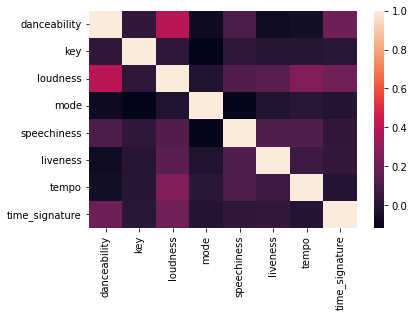

In [33]:
df.drop('valence', axis=1, inplace=True)
sns.heatmap(df.corr())

The features `loudness` and `danceability` still exhibit some positive correlation. Let us eliminate `loudness` now.

<AxesSubplot:>

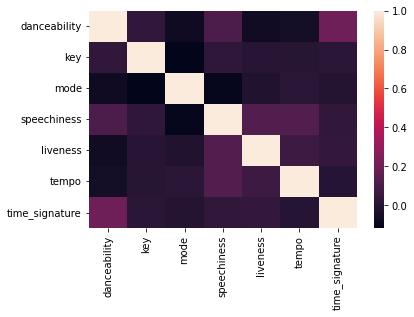

In [34]:
df.drop('loudness', axis=1, inplace=True)
sns.heatmap(df.corr())

We have finally arrived at the feature set with least possible correlation. 

## Scatter Matrix

We plot the scatter matrix finally to cross verify and make sure that there are no correlation patterns.

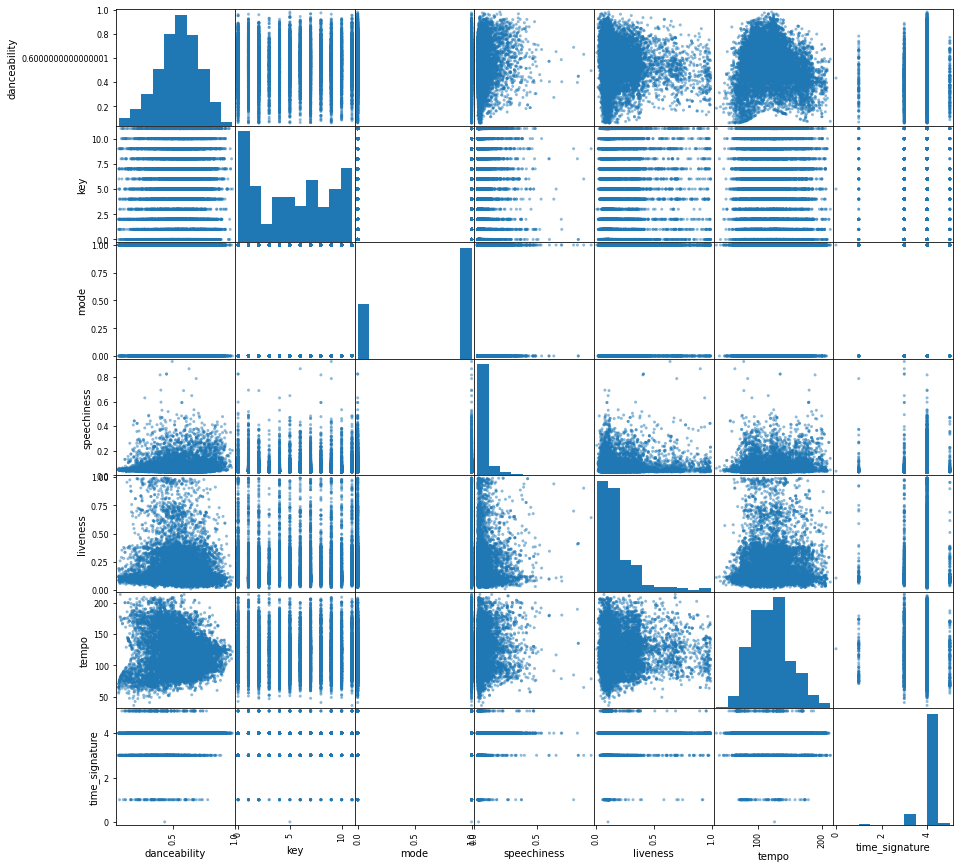

In [36]:
scatter_matrix(df, figsize=(15,15));

As we see, there no visible linear correlation amongst the remaining features. Thus we have arrived the most independent set of features and we shall use this for our further tasks.

## Writing filtered dataset to file

In [37]:
df.to_csv('data/genre_data_final.csv', index=False)